For the Final Assignment you will consider the **AMEO - Aspiring Minds' Employment Outcomes 2015 dataset**. You can download it from https://zenodo.org/records/45735..  

The dataset contains various information about a set of engineering candidates and their employment outcomes in India. For every candidate, the data contains both the profile information along with their employment outcome information.
Candidate Profile Information include:

1.   Scores on Aspiring Minds’ AMCAT – a standardized test of job skills. The test includes cognitive, domain and personality assessments
2.   Personal information like gender, date of birth, etc.
3. Pre-university information like high school grades, high school location
4. University information like GPA, college major, college reputation proxy
5. Demographic information like location of college, candidates’ permanent location.

Employment Outcome Information include:


1. First job annual salary
2. First job title
3. First job location

This is the only data set where we have employment outcomes together with scores on a standardized job test, which makes this very unique. Other such data sets either do not test scores at all or scores on pre-university tests.

**Your Task**

Your task is to construct machine learning models (using Scikit Learn) to predict the annual job salary.
You should compare a couple of models that you prefer and use as features only the ones that seem relevant ones. The model(s) should be trained on the training data and you should report the performance of the model on the test data.
You should check for missing data and other anomalies in the dataset.
*Bonus credits will be given if you can report which features are the best predictors of the First job annual salary.*

***Follow this notebook step by step to complete your assignment.***

#### **Import Libraries**

Import libraries that will be used in this notebook.


In [ ]:
# write your code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### **Load Data**

Load the training dataset downloaded from [zenodo](https://zenodo.org/records/45735) and display the first few rows, and list the columns.


In [ ]:
# write your code
data_train = pd.read_excel('/content/train.xlsx')
print(data_train.head(5))

column_names = data_train.columns.tolist()
print(*column_names, sep="\n")

  Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1         

Do the same for the test dataset.


In [ ]:
# write your code
data2_test = pd.read_excel('/content/test.xlsx')
print(data2_test.head(5))

column_names2 = data2_test.columns.tolist()
print(*column_names2, sep='\n')

  Unnamed: 0       ID Salary DOJ DOL Designation JobCity Gender        DOB  \
0       test   664736      ?   ?   ?           ?       ?      m 1992-01-16   
1       test  1123290      ?   ?   ?           ?       ?      m 1992-06-05   
2       test  1062444      ?   ?   ?           ?       ?      f 1992-11-22   
3       test  1072028      ?   ?   ?           ?       ?      f 1990-10-17   
4       test   267259      ?   ?   ?           ?       ?      m 1990-03-20   

   10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
0          75.0  ...              -1              -1              -1   
1          83.0  ...             253              -1              -1   
2          85.2  ...              -1              -1              -1   
3          81.8  ...             469              -1              -1   
4          78.0  ...              -1              -1              -1   

  TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
0          -1         -1

#### **Data Cleaning**

Form the training and test datasets, we can see we have a 'Unnamed: 0' column which is not required in the dataset. We will drop this column from the dataset. Also, test dataset does not have values for the 'Salary', 'DOJ', 'DOL', 'Designation', and 'JobCity' columns. We will drop these columns except 'Salary' from the training dataset as 'Salary' is the target variable. Do the same for the test dataset.


In [ ]:
# write your code
# write your code
data_train.drop(['Unnamed: 0', 'DOJ', 'DOL', 'Designation', 'JobCity'], axis=1, inplace=True)
data2_test.drop(['Unnamed: 0', 'DOJ', 'DOL', 'Designation', 'JobCity'], axis=1, inplace=True)

print("The Cleaned Training Data set:\n",data_train.head(5))
print()
print("The Cleaned Test Data set: \n", data2_test.head(5))

The Cleaned Training Data set:
        ID   Salary Gender        DOB  10percentage  \
0  203097   420000      f 1990-02-19          84.3   
1  579905   500000      m 1989-10-04          85.4   
2  810601   325000      f 1992-08-03          85.0   
3  267447  1100000      m 1989-12-05          85.6   
4  343523   200000      m 1991-02-27          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  ...  ComputerScience  \
0  board of intermediate education,ap       1141  ...               -1   
1                                cbse       5807  ...               -1   
2                             

Also columns like '10board', '12board', 'CollegeID', 'CollegeTier', 'CollegeCityID', 'CollegeCityTier', and 'CollegeState' may not be a good predictor for the salary. We will drop these columns as well from the training and test datasets.
[Note: You can obiously try to include these columns and see if it improves the model performance]


In [ ]:
# write your code
data_train.drop(['10board', '12board', 'CollegeID', 'CollegeTier', 'CollegeCityID', 'CollegeCityTier', 'CollegeState' ], axis=1, inplace=True)
data2_test.drop(['10board', '12board', 'CollegeID', 'CollegeTier', 'CollegeCityID', 'CollegeCityTier', 'CollegeState'], axis=1, inplace=True)

print("The Cleaned Training Data set:\n",data_train.head(5))
print()
print("The Cleaned Test Data set: \n", data2_test.head(5))

The Cleaned Training Data set:
        ID   Salary Gender        DOB  10percentage  12graduation  \
0  203097   420000      f 1990-02-19          84.3          2007   
1  579905   500000      m 1989-10-04          85.4          2007   
2  810601   325000      f 1992-08-03          85.0          2010   
3  267447  1100000      m 1989-12-05          85.6          2007   
4  343523   200000      m 1991-02-27          78.0          2008   

   12percentage       Degree                             Specialization  \
0          95.8  B.Tech/B.E.                       computer engineering   
1          85.0  B.Tech/B.E.  electronics and communication engineering   
2          68.2  B.Tech/B.E.                     information technology   
3          83.6  B.Tech/B.E.                       computer engineering   
4          76.8  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  ...  ComputerScience  MechanicalEngg  ElectricalEngg  \
0       78.00  ...               -1  

You can make the 'ID' column as the index for the training and test datasets as it is unique for each row. Use the 'set_index' method to do this.
[Note: This is not mandatory, you can simply drop the 'ID' column as well]


In [ ]:
# write your code
data_train.set_index('ID', inplace=True)
data2_test.set_index('ID', inplace=True)

print("The Cleaned Training Data set:\n",data_train.head(5))
print()
print("The Cleaned Test Data set: \n", data2_test.head(5))

The Cleaned Training Data set:
          Salary Gender        DOB  10percentage  12graduation  12percentage  \
ID                                                                            
203097   420000      f 1990-02-19          84.3          2007          95.8   
579905   500000      m 1989-10-04          85.4          2007          85.0   
810601   325000      f 1992-08-03          85.0          2010          68.2   
267447  1100000      m 1989-12-05          85.6          2007          83.6   
343523   200000      m 1991-02-27          78.0          2008          76.8   

             Degree                             Specialization  collegeGPA  \
ID                                                                           
203097  B.Tech/B.E.                       computer engineering       78.00   
579905  B.Tech/B.E.  electronics and communication engineering       70.06   
810601  B.Tech/B.E.                     information technology       70.00   
267447  B.Tech/B.E.     

Now, check the remaining columns for any missing values and data types of the columns using the 'info' method.


In [ ]:
# write your code
print("Training Information: ")
data_train.info()

print()
print("Testing Information: ")
data2_test.info()

Training Information: 
<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, 203097 to 324966
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   Gender                 3998 non-null   object        
 2   DOB                    3998 non-null   datetime64[ns]
 3   10percentage           3998 non-null   float64       
 4   12graduation           3998 non-null   int64         
 5   12percentage           3998 non-null   float64       
 6   Degree                 3998 non-null   object        
 7   Specialization         3998 non-null   object        
 8   collegeGPA             3998 non-null   float64       
 9   GraduationYear         3998 non-null   int64         
 10  English                3998 non-null   int64         
 11  Logical                3998 non-null   int64         
 12  Quant                  3998 non-null 

We can see the remaining dataset consists of:

- 3 categorical columns
- 1 datetime column
- 22 numerical columns

And there are no missing values in the dataset. But there might be some other form of missing values like '0' or '-1' which we will check now.

Find number of data points where '0' for each column in the dataset. Use the binary mask to find the number of data points where '0' for each column in the dataset and then sum the values in the binary mask to get the number of data points where '0' for each column in the dataset.


In [ ]:
# write your code

zero_train = (data_train == 0).sum()
print("Training Data set:\n", zero_train)

print()
zero_test = (data2_test == 0).sum()
print("Testing Data set:\n", zero_test)

Training Data set:
 Salary                   0
Gender                   0
DOB                      0
10percentage             0
12graduation             0
12percentage             0
Degree                   0
Specialization           0
collegeGPA               0
GraduationYear           1
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

Testing Data set:
 Salary                   0
Gender                   0
DOB                      0
10percentage             0
12graduation             0
12percentage             0
Degree                   0
Specialization           0
collegeGPA               0
Gr

Similarly, find number of data points where '-1' for each column in the dataset. Using the same approach as above.


In [ ]:
# write your code

minus_one_train = (data_train == -1).sum()
print("Training Data set:\n", minus_one_train)

print('\n')
minus_one_test = (data2_test == -1).sum()
print("Testing Data set:\n", minus_one_test)

Training Data set:
 Salary                      0
Gender                      0
DOB                         0
10percentage                0
12graduation                0
12percentage                0
Degree                      0
Specialization              0
collegeGPA                  0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
dtype: int64


Testing Data set:
 Salary                      0
Gender                      0
DOB                         0
10percentage                0
12graduation                0
12percentage    

Observe the values you can see:

- Graduation year column contain 0 which is a missing value
- DOB is given in timestamp format
- Domain column contain -1 which is a missing value


Graduation year is given as 0 which is a missing value. We will need to impute these missing values with the mode of the column. Find the mode of the column and impute the missing values with the mode binary indexing as discussed in the session.


In [ ]:
# write your code, for Train Graduation year
mode_value_gy = data_train['GraduationYear'].mode()[0]
data_train.loc[data_train['GraduationYear'] == 0, 'GraduationYear'] = mode_value_gy

#For Train Domain value
mode_value_domain_train = data_train['Domain'].mode()[0]
data_train.loc[data_train['Domain'] == 0, 'Domain'] = mode_value_domain_train


#For Test Domain value
mode_value_domain_test = data2_test['Domain'].mode()[0]
data2_test.loc[data2_test['Domain'] == 0, 'Domain'] = mode_value_domain_test




Now, see the 'DOB' may also not be a good predictor for the salary. But we can use the 'DOB', '12graduation' and 'GraduationYear' columns to calculate the age of the candidate when he/she graduated from High School and College. That might be a good predictor for the salary as from the two age we may determine if the candidate is a prodigy or not, dropout or not, etc.

- Convert the 'DOB' datetime to 'BirthYear' using the 'dt' accessor.
- Calculate the '12GradAge' by subtracting the '12graduation' from the 'BirthYear'.
- Calculate the 'GradAge' by subtracting the 'GraduationYear' from the 'BirthYear'.
- Drop the 'DOB', '12graduation', and 'GraduationYear' columns from the training and test datasets.

[Note: You are free to use any insights from these that you think might be useful and improve the model performance]


In [ ]:
# Training Dataset
print("Treaining Data Set:")
data_train["DOB"] = pd.to_datetime(data_train["DOB"])
BirthYear_train = data_train["DOB"].dt.year

data_train["12GradAge"] = data_train["12graduation"] - BirthYear_train
data_train["GradAge"] = data_train["GraduationYear"] - BirthYear_train
data_train.drop(['DOB', '12graduation', 'GraduationYear'], axis=1, inplace=True)

print(data_train.head(5))


# Test Dataset

print("Test Data Set:\n")
data2_test["DOB"] = pd.to_datetime(data2_test["DOB"])
BirthYear_test = data2_test["DOB"].dt.year

data2_test["12GradAge"] = data2_test["12graduation"] - BirthYear_test
data2_test["GradAge"] = data2_test["GraduationYear"] - BirthYear_test
data2_test.drop(['DOB', '12graduation', 'GraduationYear'], axis=1, inplace=True)


print(data2_test.head(5))

Treaining Data Set:
         Salary Gender  10percentage  12percentage       Degree  \
ID                                                                
203097   420000      f          84.3          95.8  B.Tech/B.E.   
579905   500000      m          85.4          85.0  B.Tech/B.E.   
810601   325000      f          85.0          68.2  B.Tech/B.E.   
267447  1100000      m          85.6          83.6  B.Tech/B.E.   
343523   200000      m          78.0          76.8  B.Tech/B.E.   

                                   Specialization  collegeGPA  English  \
ID                                                                       
203097                       computer engineering       78.00      515   
579905  electronics and communication engineering       70.06      695   
810601                     information technology       70.00      615   
267447                       computer engineering       74.64      635   
343523  electronics and communication engineering       73.90     

Map specializations to following categories:

- 'CS' for Computer Science
- 'EC' for Electronics
- 'ME' for Mechanical
- 'EL' for Electrical
- 'CE' for Civil
- 'other' for other specializations

Use the dictionary given below to map the specializations to the categories using the 'map' method.


In [ ]:
specialization_map = \
    {'electronics and communication engineering': 'EC',
     'computer science & engineering': 'CS',
     'information technology': 'CS',
     'computer engineering': 'CS',
     'computer application': 'CS',
     'mechanical engineering': 'ME',
     'electronics and electrical engineering': 'EC',
     'electronics & telecommunications': 'EC',
     'electrical engineering': 'EL',
     'electronics & instrumentation eng': 'EC',
     'civil engineering': 'CE',
     'electronics and instrumentation engineering': 'EC',
     'information science engineering': 'CS',
     'instrumentation and control engineering': 'EC',
     'electronics engineering': 'EC',
     'biotechnology': 'other',
     'other': 'other',
     'industrial & production engineering': 'other',
     'chemical engineering': 'other',
     'applied electronics and instrumentation': 'EC',
     'computer science and technology': 'CS',
     'telecommunication engineering': 'EC',
     'mechanical and automation': 'ME',
     'automobile/automotive engineering': 'ME',
     'instrumentation engineering': 'EC',
     'mechatronics': 'ME',
     'electronics and computer engineering': 'CS',
     'aeronautical engineering': 'ME',
     'computer science': 'CS',
     'metallurgical engineering': 'other',
     'biomedical engineering': 'other',
     'industrial engineering': 'other',
     'information & communication technology': 'EC',
     'electrical and power engineering': 'EL',
     'industrial & management engineering': 'other',
     'computer networking': 'CS',
     'embedded systems technology': 'EC',
     'power systems and automation': 'EL',
     'computer and communication engineering': 'CS',
     'information science': 'CS',
     'internal combustion engine': 'ME',
     'ceramic engineering': 'other',
     'mechanical & production engineering': 'ME',
     'control and instrumentation engineering': 'EC',
     'polymer technology': 'other',
     'electronics': 'EC'}

# Training Data

print("Training Data Set:\n")
data_train["Specialization"] = data_train["Specialization"].map(specialization_map)
print(data_train.head(5))

#Testing Data

print("Testing Data Set:\n")
data2_test["Specialization"] = data2_test["Specialization"].map(specialization_map)
print(data2_test.head(5))

Training Data Set:

         Salary Gender  10percentage  12percentage       Degree  \
ID                                                                
203097   420000      f          84.3          95.8  B.Tech/B.E.   
579905   500000      m          85.4          85.0  B.Tech/B.E.   
810601   325000      f          85.0          68.2  B.Tech/B.E.   
267447  1100000      m          85.6          83.6  B.Tech/B.E.   
343523   200000      m          78.0          76.8  B.Tech/B.E.   

       Specialization  collegeGPA  English  Logical  Quant  ...  \
ID                                                          ...   
203097             CS       78.00      515      585    525  ...   
579905             EC       70.06      695      610    780  ...   
810601             CS       70.00      615      545    370  ...   
267447             CS       74.64      635      585    625  ...   
343523             EC       73.90      545      625    465  ...   

        ElectricalEngg  TelecomEngg  Civ

Now, we will update the college GPA column. In data description, it is mentioned that some of the students have GPA on a scale of 10 and some on a scale of 100. We will convert the GPA that are less than 10 to a scale of 100 by multiplying them by 10. Use the binary indexing to update the collegeGPA column.


In [ ]:
# Training Data
print("Training Data: \n")
data_train.loc[data_train['collegeGPA'] < 10, 'collegeGPA'] *= 10
print(data_train.head(100))


print("Testing Data: \n")
#Testing Data
data2_test.loc[data2_test['collegeGPA'] < 10, 'collegeGPA'] *= 10
print(data2_test.head(100))

Training Data: 

          Salary Gender  10percentage  12percentage       Degree  \
ID                                                                 
203097    420000      f          84.3          95.8  B.Tech/B.E.   
579905    500000      m          85.4          85.0  B.Tech/B.E.   
810601    325000      f          85.0          68.2  B.Tech/B.E.   
267447   1100000      m          85.6          83.6  B.Tech/B.E.   
343523    200000      m          78.0          76.8  B.Tech/B.E.   
...          ...    ...           ...           ...          ...   
318391    425000      f          83.5          94.2  B.Tech/B.E.   
60260     450000      m          65.0          66.0  B.Tech/B.E.   
1026621   300000      f          88.0          88.0  B.Tech/B.E.   
112994    470000      m          79.0          76.6  B.Tech/B.E.   
1123186   120000      m          55.6          50.8          MCA   

        Specialization  collegeGPA  English  Logical  Quant  ...  \
ID                            

Now, according to the data description, the 'Domain' column is the score of the candidate in their domain specific test which is scaled to 0-1, from the following optional tests:

- ComputerProgramming
- ElectronicsAndSemicon
- ComputerScience
- MechanicalEngg
- ElectricalEngg
- TelecomEngg
- CivilEngg

Now as the values in the 'Domain' column are calculated from the above columns, we can drop the above columns from the training and test datasets. Also, drop the rows with -1 in the 'Domain' column as they are missing values.

[Note: Befor dropping you can try find the missing 246 train values of 'Domain' column using the above columns and impute them. In this case a little portion of the data is missing so we are dropping the rows.]


In [ ]:
# Training Data Set
data_train.drop(["ComputerProgramming", "ElectronicsAndSemicon", "ComputerScience", "MechanicalEngg", "ElectricalEngg", "TelecomEngg", "CivilEngg"], axis=1, inplace=True)
data_train = data_train[data_train["Domain"] > -1]
print(data_train.head(10))


#Test Data Set
data2_test.drop(["ComputerProgramming", "ElectronicsAndSemicon", "ComputerScience", "MechanicalEngg", "ElectricalEngg", "TelecomEngg", "CivilEngg"], axis=1, inplace=True)
data2_test = data2_test[data2_test["Domain"] > -1]
print(data2_test.head(10))


          Salary Gender  10percentage  12percentage       Degree  \
ID                                                                 
203097    420000      f         84.30          95.8  B.Tech/B.E.   
579905    500000      m         85.40          85.0  B.Tech/B.E.   
810601    325000      f         85.00          68.2  B.Tech/B.E.   
267447   1100000      m         85.60          83.6  B.Tech/B.E.   
343523    200000      m         78.00          76.8  B.Tech/B.E.   
947847    300000      m         86.08          67.5  B.Tech/B.E.   
912934    400000      m         92.00          91.0  B.Tech/B.E.   
552574    600000      m         90.00          91.2  B.Tech/B.E.   
1203363   230000      m         77.00          72.2  B.Tech/B.E.   
87291     600000      m         88.60          83.7  B.Tech/B.E.   

        Specialization  collegeGPA  English  Logical  Quant    Domain  \
ID                                                                      
203097              CS       78.00   

Now print the information of the training and test datasets using the 'info' method.


In [ ]:
# write your code
data_train.info()

data2_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3752 entries, 203097 to 324966
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3752 non-null   int64  
 1   Gender                 3752 non-null   object 
 2   10percentage           3752 non-null   float64
 3   12percentage           3752 non-null   float64
 4   Degree                 3752 non-null   object 
 5   Specialization         3752 non-null   object 
 6   collegeGPA             3752 non-null   float64
 7   English                3752 non-null   int64  
 8   Logical                3752 non-null   int64  
 9   Quant                  3752 non-null   int64  
 10  Domain                 3752 non-null   float64
 11  conscientiousness      3752 non-null   float64
 12  agreeableness          3752 non-null   float64
 13  extraversion           3752 non-null   float64
 14  nueroticism            3752 non-null   float64
 15  op

From the information, we can see that in test dataset, 'Specialization' column has 2 null values. Remove the rows with null values in the 'Specialization' column from the test dataset.


In [ ]:
# Testing Data set:

data2_test = data2_test[data2_test["Specialization"].notna()]

We are left with the following columns in the dataset:

- Salary: Target
- Gender: Categorical Feature
- 10percentage: Numerical Feature
- 12percentage: Numerical Feature
- Degree: Categorical Feature
- Specialization: Categorical Feature
- collegeGPA: Numerical Feature
- English: Numerical Feature
- Logical: Numerical Feature
- Quant: Numerical Feature
- Domain: Numerical Feature
- conscientiousness: Numerical Feature
- agreeableness: Numerical Feature
- extraversion: Numerical Feature
- nueroticism: Numerical Feature
- openess_to_experience: Numerical Feature
- 12GradAge: Numerical Feature
- GradAge: Numerical Feature

3 categorical features and 14 numerical features.


Drop 'Salary' column from the test dataset as it contains nothing but '?' values.


In [ ]:
# Testing data

data2_test.drop("Salary", axis=1, inplace=True)
data2_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1412 entries, 664736 to 1037308
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 1412 non-null   object 
 1   10percentage           1412 non-null   float64
 2   12percentage           1412 non-null   float64
 3   Degree                 1412 non-null   object 
 4   Specialization         1412 non-null   object 
 5   collegeGPA             1412 non-null   float64
 6   English                1412 non-null   int64  
 7   Logical                1412 non-null   int64  
 8   Quant                  1412 non-null   int64  
 9   Domain                 1412 non-null   float64
 10  conscientiousness      1412 non-null   float64
 11  agreeableness          1412 non-null   float64
 12  extraversion           1412 non-null   float64
 13  nueroticism            1412 non-null   float64
 14  openess_to_experience  1412 non-null   float64
 15  1

Check for outliers in the numerical columns using the 'boxplot'. We are doing it only for the 'Salary' column. You can do it for other columns as well and remove the outliers if you want.


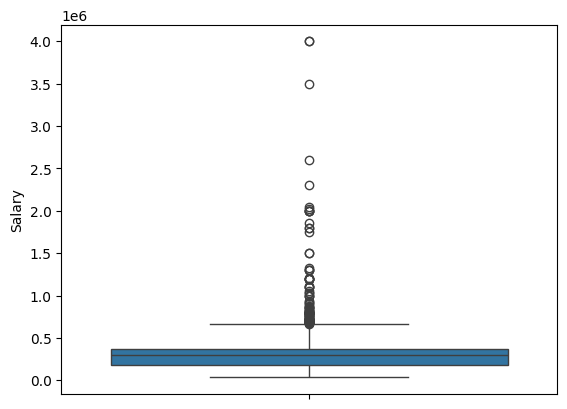

In [ ]:
# Training Data
sns.boxplot(data_train["Salary"])
plt.show()

Salary > 10,00,000 is rare, especially in the first job. From the boxplot, this is also evident. We can remove the data points where Salary > 10,00,000 from the training dataset.


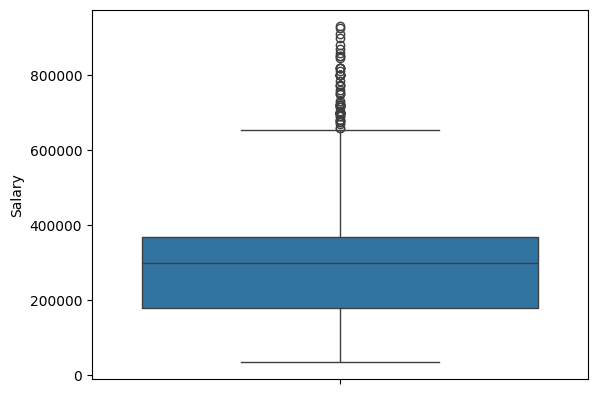

In [ ]:
# Training Data Set

data_train = data_train[data_train["Salary"] < 1000000]

sns.boxplot(data_train["Salary"])
plt.show()


#### **Data preprocessing**

Now, we will preprocess the data before feeding it to the model. We can't feed the categorical data directly to the model. We need to encode the categorical columns and scale the numerical columns. We will use the 'One Hot Encoding' and 'Label Encoding' to encode the categorical columns and 'Standard Scaler' to scale the numerical columns.

- 'Label Encoding' is used to encode the categorical columns by assigning a unique integer to each category. This technique is useful if the number of categories is less. If the number of categories is more, let's say 5 then we may use 0 to 4 to encode the categories. But the has some problem, though we assigned the integers randomly, the model may assume that the categories have some kind of order or hierarchy. To avoid this, we use 'OneHot Encoding'.
- 'One Hot Encoding' is used to encode the categorical columns by creating a separate column for each category and assigning 1 or 0 to the columns. This technique is useful if the number of categories is more.

We will use 'LabelEncoder' to encode the 'Gender' and pandas 'get_dummies' method to encode the 'Degree' and 'Specialization' columns in one hot encoding. We will use 'StandardScaler' to scale the numerical columns. All these encoders are available in the 'sklearn.preprocessing' module. import them and use them to preprocess the data.


In [ ]:
# Training Data
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

label_encoder = LabelEncoder()
data_train["Gender"] = label_encoder.fit_transform(data_train["Gender"])


# print(data_train.head(10))

data_train = pd.get_dummies(data_train, columns=['Degree', 'Specialization'])
data_train.info()

columns_list = ['Degree_B.Tech/B.E.', 'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.', 'Degree_MCA', 'Specialization_CE', 'Specialization_CS', 'Specialization_EC', 'Specialization_EL', 'Specialization_ME', 'Specialization_other']

data_train[columns_list] = data_train[columns_list].replace({True: 1, False: 0})


print(data_train.head(10))

#Using StandardScaler:

numerical_cols = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical',
                  'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
                  'nueroticism', 'openess_to_experience', '12GradAge', 'GradAge']
scaler = StandardScaler()
data_train[numerical_cols] = scaler.fit_transform(data_train[numerical_cols])


print(data_train.head(10))

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3715 entries, 203097 to 324966
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3715 non-null   int64  
 1   Gender                 3715 non-null   int64  
 2   10percentage           3715 non-null   float64
 3   12percentage           3715 non-null   float64
 4   collegeGPA             3715 non-null   float64
 5   English                3715 non-null   int64  
 6   Logical                3715 non-null   int64  
 7   Quant                  3715 non-null   int64  
 8   Domain                 3715 non-null   float64
 9   conscientiousness      3715 non-null   float64
 10  agreeableness          3715 non-null   float64
 11  extraversion           3715 non-null   float64
 12  nueroticism            3715 non-null   float64
 13  openess_to_experience  3715 non-null   float64
 14  12GradAge              3715 non-null   int64  
 15  Gr

#### **Feature Selection**

Now the dataset is ready for the model. But before that, we need to select the features that are important for the model. You can use the 'Correlation Matrix' to find the correlation between the features and the target variable and select the features that have a high correlation with the target variable.

There are other methods to select the features like 'SelectKBest', 'SelectPercentile', 'RFE', 'RFECV', etc. You can use any of these methods to select the features. See the documentation of the 'sklearn.feature_selection' module for more information.

[Note: Bonus credits will be given if you can report which features are the best predictors of the First job annual salary.]


In [ ]:
X = data_train[['Gender', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', '12GradAge', 'GradAge', 'Degree_B.Tech/B.E.', 'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.', 'Degree_MCA', 'Specialization_CE', 'Specialization_CS', 'Specialization_EC', 'Specialization_EL', 'Specialization_ME', 'Specialization_other']]
y = data_train['Salary']


In [ ]:
# # Using the Correlation Matrix

corr_matrix = data_train.corr()

# print(corr_matrix)

threashhold = 0.1

features = corr_matrix.index[abs(corr_matrix['Salary']) > threashhold].tolist()

print(features)
# print(data_train.head(10))


# print()
#Using SelectKbest
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer

k = 7
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X, y.values.ravel())
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
X_filtered = X.iloc[:, selected_indices]
print("Selected Features:", selected_features)





# #Using RFE
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# # X_rfe = data_train.drop(columns=['Salary'])

# X_rfe = data_train[['Gender', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'openess_to_experience', '12GradAge', 'GradAge']]
# y = data_train['Salary']

# model1 = LogisticRegression()
# rfe = RFE(model1, n_features_to_select=6)
# fit = rfe.fit(X_rfe, y)

# selected_features = X_rfe.columns[fit.support_].tolist()

# print(*selected_features)



['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain']
Selected Features: Index(['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical',
       'Quant', 'Domain'],
      dtype='object')


#### **Split the data**

After selecting the features, split the data into training and validation sets using the 'train_test_split' method. Use 20% of the data for validation.


In [ ]:
X = data_train[['Gender', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', '12GradAge', 'GradAge', 'Degree_B.Tech/B.E.', 'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.', 'Degree_MCA', 'Specialization_CE', 'Specialization_CS', 'Specialization_EC', 'Specialization_EL', 'Specialization_ME', 'Specialization_other']]
y = data_train['Salary']


In [ ]:
from sklearn.model_selection import train_test_split

x = data_train[['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain']]
y = data_train['Salary']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

#### **Model Selection**

Now, we will select the model that best fits the data. You should try different models and select the one that gives the best performance. You can use the 'Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', etc. models to predict the salary.

You can use sklearn's 'cross_val_score' method to find the cross-validation score of multiple models and select the best model.


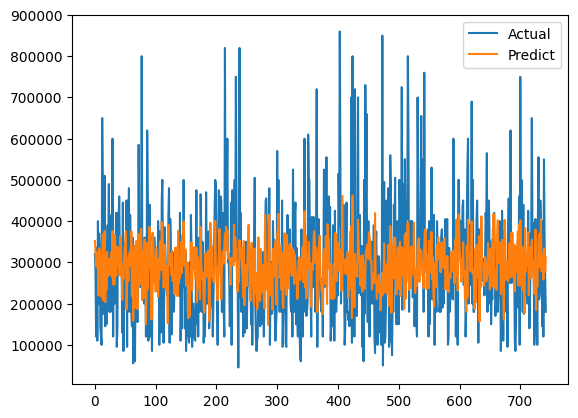

Cross val Score:  [-1.51113778e+10 -1.57722912e+10 -1.57375016e+10 -1.55968400e+10
 -1.70631556e+10]


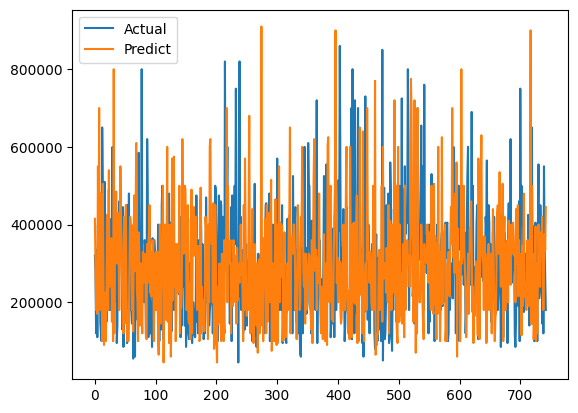

Cross val Score:  [-3.35020861e+10 -3.31812463e+10 -3.33235195e+10 -3.16177658e+10
 -3.29693809e+10]


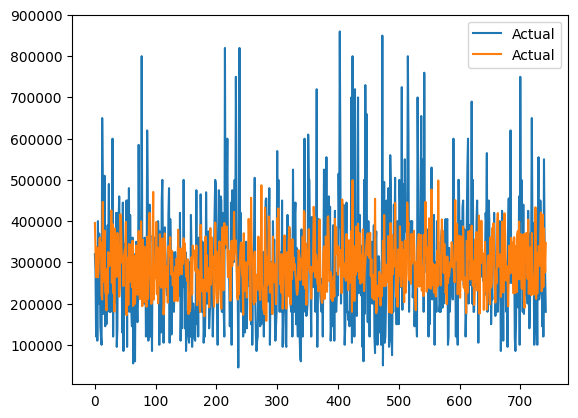

Cross val Score:  [-3.44739569e+10 -3.39220808e+10 -3.30936070e+10 -3.24777254e+10
 -3.30835801e+10]



In [ ]:
# LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model1 = LinearRegression()
model1.fit(x_train, y_train)
# print(model1.coef_)
# print(model1.intercept_)

y_predict = model1.predict(x_val)
sns.lineplot(y_val.values, legend=True, label= "Actual")
sns.lineplot(y_predict, legend=True, label="Predict")
plt.show()

scores1 = cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error')

print("Cross val Score: ", scores1)



#DicisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)
y_predict2 = model2.predict(x_val)
sns.lineplot(y_val.values, legend=True, label= "Actual")
sns.lineplot(y_predict2, legend=True, label="Predict")
plt.show()

scores2 = cross_val_score(model2, X, y, cv=5, scoring='neg_mean_squared_error')

print("Cross val Score: ", scores2)


#RandomForest

from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()
model3.fit(x_train, y_train)
y_predict3 = model3.predict(x_val)

sns.lineplot(y_val.values, legend=True, label="Actual")
sns.lineplot(y_predict3, legend=True, label="Actual")
plt.show()

scores2 = cross_val_score(model2, X, y, cv=5, scoring='neg_mean_squared_error')

print("Cross val Score: ", scores2)


print()

#### **Model Evaluation**

After selecting the model, evaluate the model using the validation set. You can use 'mean_squared_error', 'mean_absolute_error', 'r2_score', etc. to evaluate the model.


In [ ]:
# r2_score

#LinearRegression
from sklearn.metrics import r2_score

r2 = r2_score(y_val, y_predict)
print("r2 score: ",r2)

#DecisionTree

r2_2 = r2_score(y_val, y_predict2)
print("r2 score: ",r2_2)

#RandomForest
r2_3 = r2_score(y_val, y_predict3)
print("r2 score: ",r2_3)

print()
#mean_squared


#LinearRegression
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(y_val, y_predict)
print("Mean Squared Error:", mse1)


#DecisionTree
mse2 = mean_squared_error(y_val, y_predict2)
print("Mean Suqared Error: ", mse2)

#RandomForest
mse3 = mean_squared_error(y_val, y_predict3)
print("Mean Squared Error: ", mse3)

print()


#mean_absolute_error
from sklearn.metrics import mean_absolute_error


#LinearRegression
mae1 = mean_absolute_error(y_val, y_predict)
print("Mean Absolute Error", mae1)

#DecisionTree
mae2 = mean_absolute_error(y_val, y_predict2)
print("Mean Absolute Error", mae2)


#Random Forest
mae3 = mean_absolute_error(y_val, y_predict3)
print("Mean Absolute Error", mae3)

r2 score:  0.20506359708295918
r2 score:  -0.7473053807752714
r2 score:  0.1239642467952825

Mean Squared Error: 16599425627.564425
Mean Suqared Error:  36486271870.794075
Mean Squared Error:  18292897745.087482

Mean Absolute Error 97872.16673745385
Mean Absolute Error 143728.12920592193
Mean Absolute Error 103435.7200538358
